In [ ]:
import tensorflow as tf

In [ ]:
rank_0_tensor = tf.constant(5)
rank_0_tensor

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
rank_2_tensor

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)>

In [ ]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

In [ ]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


In [ ]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [ ]:
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [ ]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

X= np.expand_dims(X, axis=0).T
Y= np.expand_dims(Y, axis=0).T
print(X.shape)

(30, 1)


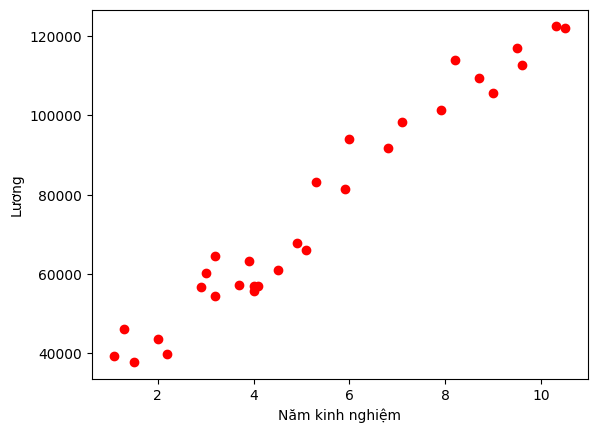

In [ ]:
# Visualize data
plt.plot(X, Y, 'ro')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Năm kinh nghiệm')
plt.ylabel('Lương')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, Y)

# print the model coefficients
print('Coefficients:', reg.coef_)
print('Bias:', reg.intercept_)

Coefficients: [[9449.96232146]]
Bias: [25792.20019867]


In [ ]:
def plot(x, y):
  plt.scatter(X,Y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Năm kinh nghiệm')
  plt.ylabel('Lương')
  plt.legend()

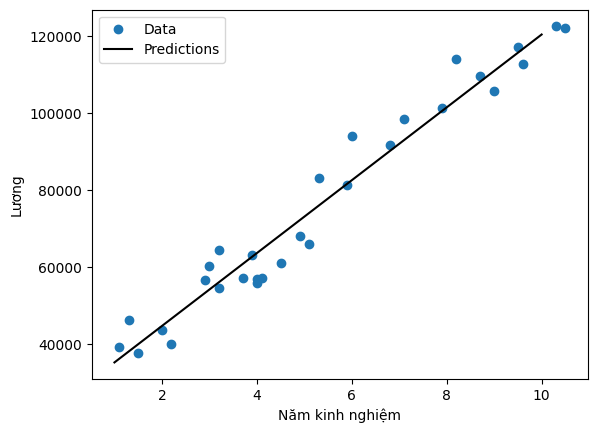

In [ ]:
x = tf.linspace(1, 10, 11)
x = tf.transpose(tf.expand_dims(x, axis=0))
y_pred = reg.predict(x)
plot(x, y_pred)

In [ ]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
print(W, b)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.87605983> <tf.Variable 'bias:0' shape=() dtype=float32, numpy=-1.8755972>


In [ ]:
def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
for step in range(1, training_steps + 1):
  with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

  gradients = g.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 111859288.000000, W: 12315.119141, b: 6484.667969
step: 100, loss: 84012832.000000, W: 11767.836914, b: 10172.653320
step: 150, loss: 65788416.000000, W: 11325.093750, b: 13156.187500
step: 200, loss: 53861260.000000, W: 10966.919922, b: 15569.828125
step: 250, loss: 46055396.000000, W: 10677.160156, b: 17522.435547
step: 300, loss: 40946792.000000, W: 10442.750000, b: 19102.064453
step: 350, loss: 37603396.000000, W: 10253.114258, b: 20379.970703
step: 400, loss: 35415296.000000, W: 10099.702148, b: 21413.775391
step: 450, loss: 33983252.000000, W: 9975.592773, b: 22250.115234
step: 500, loss: 33046038.000000, W: 9875.191406, b: 22926.697266
step: 550, loss: 32432686.000000, W: 9793.966797, b: 23474.042969
step: 600, loss: 32031256.000000, W: 9728.257812, b: 23916.839844
step: 650, loss: 31768546.000000, W: 9675.098633, b: 24275.064453
step: 700, loss: 31596600.000000, W: 9632.094727, b: 24564.857422
step: 750, loss: 31484078.000000, W: 9597.304688, b: 24799.296875
ste

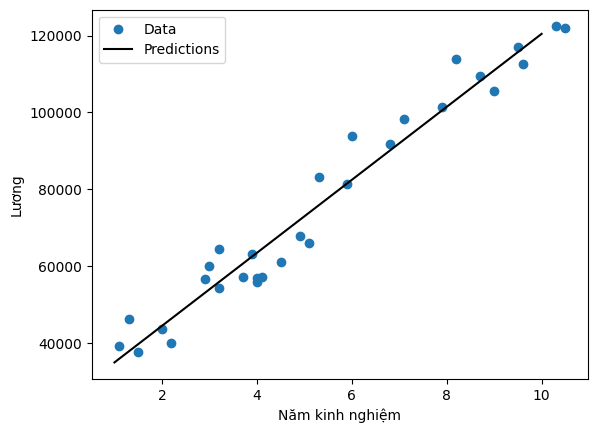

In [ ]:
x = tf.transpose(tf.linspace(1, 10, 11))

# convert to float32
x = tf.cast(x, tf.float32)

y_pred = linear_regression(x)
plot(x, y_pred)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

learning_rate = 0.01

model = Sequential()
model.add(Dense(1, input_dim=1))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(X)

1/1 [==============================] - 0s 176ms/step


array([[ 1.1522138],
       [ 1.3617072],
       [ 1.5712006],
       [ 2.0949342],
       [ 2.3044276],
       [ 3.0376546],
       [ 3.1424012],
       [ 3.3518949],
       [ 3.3518949],
       [ 3.8756285],
       [ 4.0851216],
       [ 4.1898685],
       [ 4.1898685],
       [ 4.2946153],
       [ 4.713602 ],
       [ 5.132589 ],
       [ 5.342082 ],
       [ 5.5515757],
       [ 6.180056 ],
       [ 6.2848024],
       [ 7.1227765],
       [ 7.4370165],
       [ 8.27499  ],
       [ 8.589231 ],
       [ 9.112964 ],
       [ 9.427204 ],
       [ 9.950937 ],
       [10.055685 ],
       [10.788912 ],
       [10.9984045]], dtype=float32)

In [ ]:
history = model.fit(
    X,
    Y,
    epochs=500,
    verbose=1
   )

Epoch 1/500
1/1 [==============================] - 1s 597ms/step - loss: 6501955072.0000
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 595404992.0000
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 183104688.0000
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 153441120.0000
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 150433120.0000
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 149289376.0000
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 148283344.0000
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 147294704.0000
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 146315072.0000
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 145343776.0000
Epoch 11/500
1/1 [==============================] - 0s 14ms/step - loss: 144380640.0000
Epoch 12/500
1/1 [=====================

In [ ]:
weights, bias = model.get_weights()
print('Coefficients:', weights)
print('Bias:', bias[0])

Coefficients: [[9875.158]]
Bias: 22926.914


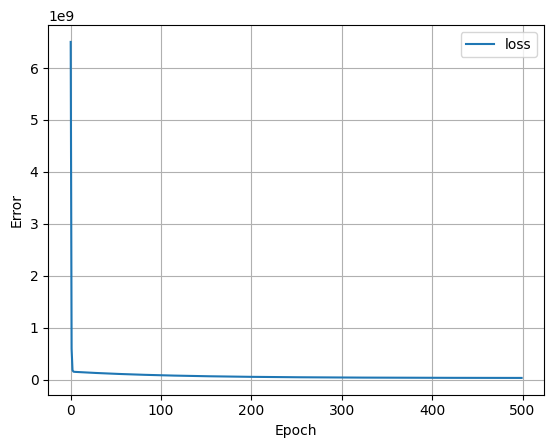

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
y_pred = model.predict(X)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 33789.586],
       [ 35764.617],
       [ 37739.652],
       [ 42677.23 ],
       [ 44652.26 ],
       [ 51564.875],
       [ 52552.39 ],
       [ 54527.42 ],
       [ 54527.42 ],
       [ 59465.   ],
       [ 61440.03 ],
       [ 62427.547],
       [ 62427.547],
       [ 63415.062],
       [ 67365.125],
       [ 71315.19 ],
       [ 73290.22 ],
       [ 75265.25 ],
       [ 81190.34 ],
       [ 82177.86 ],
       [ 90077.99 ],
       [ 93040.54 ],
       [100940.664],
       [103903.21 ],
       [108840.79 ],
       [111803.336],
       [116740.914],
       [117728.44 ],
       [124641.05 ],
       [126616.08 ]], dtype=float32)

1/1 [==============================] - 0s 50ms/step


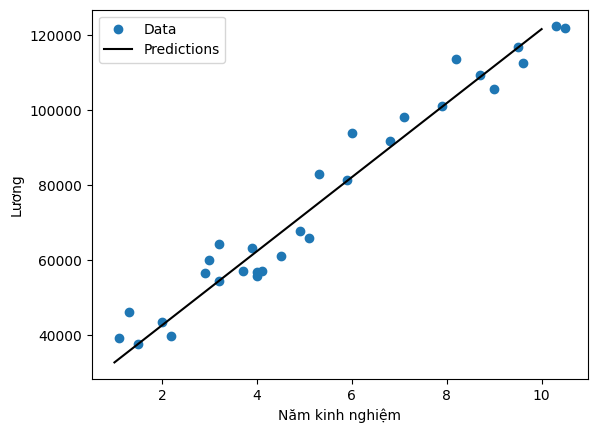

In [ ]:
x = tf.transpose(tf.linspace(1, 10, 11))
y_pred = model.predict(x)
plot(x, y_pred)